# 0.2 Neural Network Classification with PyTorch

Classificaation is the problem of predicting whether something is one thing or another (there can be multiple options). 

## 1. Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples=n_samples,
                    noise= 0.03,
                    random_state= 42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [5]:
# Make a dataframe of the circle data
import pandas as pd

circles = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "label" : y})

circles.head()


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


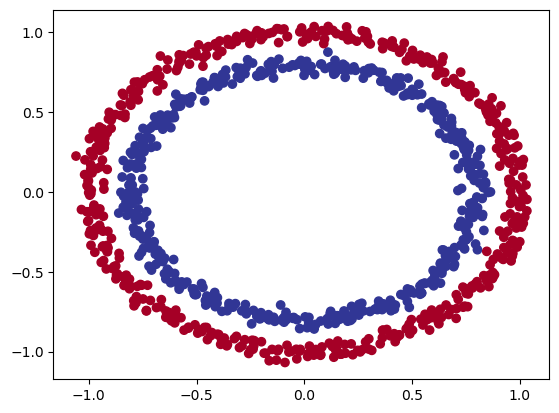

In [6]:
# Visualize, Visualize, Visualize

import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu)

Note: The data we are working with is often referred to as a toy dataset, a dataset that is small emough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check with input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn Data into tensors and create train and test splits

In [9]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [10]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [11]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split

train_split = int(0.8 * len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = train_split,
                                                    shuffle = True,
                                                    random_state=42)

print(f"Shape of train data : {X_train.shape} | Shape of train labels : {y_train.shape}"
      f"\nShape of test data : {X_test.shape} | Shape of test labels : {y_test.shape}")

Shape of train data : torch.Size([800, 2]) | Shape of train labels : torch.Size([800])
Shape of test data : torch.Size([200, 2]) | Shape of test labels : torch.Size([200])


## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one.
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. create a training and test loop

In [12]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we have set up device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (orforward computation) of the model
4. Instantiate an instance of our model clss and send it to the target `device`

In [14]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 linear layers
        self.linear_layer_1 = nn.Linear(in_features=2,
                                       out_features=100)
        self.activation_1 = torch.nn.ReLU()
        self.linear_layer_2 = nn.Linear(in_features=100,
                                        out_features=100)
        self.activation_2 = torch.nn.ReLU()
        self.linear_layer_3 = nn.Linear(in_features=100,
                                        out_features=1)
        
    # 3. Define the forward method
    def forward(self, x):
        return self.linear_layer_3(self.activation_2(self.linear_layer_2(self.activation_1(self.linear_layer_1(x))))) # x -> layer_1 -> layer_2 -> output
    
# 4. Instantiate an instace of our model class and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (linear_layer_1): Linear(in_features=2, out_features=100, bias=True)
  (activation_1): ReLU()
  (linear_layer_2): Linear(in_features=100, out_features=100, bias=True)
  (activation_2): ReLU()
  (linear_layer_3): Linear(in_features=100, out_features=1, bias=True)
)

In [15]:
model_0.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[-0.0556,  0.6840],
                      [-0.0857,  0.1397],
                      [ 0.2884, -0.2474],
                      [-0.2566, -0.0209],
                      [ 0.5293,  0.3841],
                      [-0.1934, -0.1064],
                      [ 0.3844, -0.2110],
                      [ 0.1039, -0.0551],
                      [-0.3870,  0.2233],
                      [ 0.2913, -0.5914],
                      [-0.6826,  0.3835],
                      [ 0.2168,  0.3717],
                      [ 0.6008,  0.5607],
                      [-0.4801,  0.5570],
                      [ 0.1127,  0.4773],
                      [-0.2580, -0.3399],
                      [-0.4965,  0.2175],
                      [-0.4130,  0.3078],
                      [ 0.2566, -0.4657],
                      [ 0.1285, -0.4254],
                      [-0.2146,  0.4548],
                      [-0.5362, -0.5681],
                      [ 0.0350, -0.40

In [16]:
# Make predictions using the untrained model

with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions : {len(untrained_preds)}, Shape : {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}, Shape:{X_test.shape}")
print(f"\n First 10 predicitons : \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions : 200, Shape : torch.Size([200, 1])
Length of test samples : 200, Shape:torch.Size([200, 2])

 First 10 predicitons : 
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]], device='cuda:0')

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup Loss function and optimizer

Which loss function or optimizer should you use?

Again,... this is problem specific.

For example, for regression you might want to you L1loss(MAE), MSE (MEan square error)

For classification you might want to use BCE (binary cross entropy) or categorical cross entropy

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the common and useful ones are SGD and Adam.

* For the loss function, we are going to use `torch.nn.BCEWithLogitsLoss()`

* For different optimizers see, `torch.optim`

In [17]:
# Setup a loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid acitvation function prior
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr= 0.01)

In [18]:
model_0.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[-0.0556,  0.6840],
                      [-0.0857,  0.1397],
                      [ 0.2884, -0.2474],
                      [-0.2566, -0.0209],
                      [ 0.5293,  0.3841],
                      [-0.1934, -0.1064],
                      [ 0.3844, -0.2110],
                      [ 0.1039, -0.0551],
                      [-0.3870,  0.2233],
                      [ 0.2913, -0.5914],
                      [-0.6826,  0.3835],
                      [ 0.2168,  0.3717],
                      [ 0.6008,  0.5607],
                      [-0.4801,  0.5570],
                      [ 0.1127,  0.4773],
                      [-0.2580, -0.3399],
                      [-0.4965,  0.2175],
                      [-0.4130,  0.3078],
                      [ 0.2566, -0.4657],
                      [ 0.1285, -0.4254],
                      [-0.2146,  0.4548],
                      [-0.5362, -0.5681],
                      [ 0.0350, -0.40

In [19]:
# Calculate accuracy

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) *100
    return acc

## 3. Train model

To train our model we are going to need a training loop:

1. Forward Pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [20]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0223],
        [-0.0246],
        [-0.0994],
        [-0.0296],
        [-0.0370]], device='cuda:0')

In [21]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [22]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4944],
        [0.4938],
        [0.4752],
        [0.4926],
        [0.4908]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5 y=1 (class 1)
* `y_pred_probs` < 0.5 y=0 (class 0)

In [23]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

### 3.2 Building a training  and testing loop

In [24]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10000

model_0.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # Training
    model_0.train()

    # Forward pass
    y_logits = model_0(X_train).squeeze()
    y_preds_train = torch.round(torch.sigmoid(y_logits)) # turn logits in pred probs and then later in pred labels

    # Calculate loss
    #training_loss = loss_fn(torch.sigmoid(y_logits)) # nn.BCELoss expects prediction probabilities as input rather than logits
    training_loss = loss_fn(y_logits, y_train)  # nn.BCEWithLogitsLoss expects raw logits as input

    # Calculate Accuracy
    training_acc = accuracy_fn(y_train, y_preds_train)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backward pass (backpropagation)
    training_loss.backward()

    # Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # forward pass
        y_logits_test = model_0(X_test).squeeze()
        y_preds_test = torch.round(torch.sigmoid(y_logits_test))

        # Calculate loss
        test_loss = loss_fn(y_logits_test, y_test)

        # Calculate accuracy
        test_acc = accuracy_fn(y_test, y_preds_test)

    # Print the metrics
    if epoch %1000 ==0:
        print(f"Epoch : {epoch}, Training Accuracy : {training_acc}% | Training Loss : {training_loss:.5f}, Test Accuracy : {test_acc}% | Test Loss : {test_loss:.5f}")
        
model_0.state_dict()

Epoch : 0, Training Accuracy : 44.875% | Training Loss : 0.69117, Test Accuracy : 45.5% | Test Loss : 0.69321
Epoch : 1000, Training Accuracy : 84.375% | Training Loss : 0.66539, Test Accuracy : 82.0% | Test Loss : 0.67089
Epoch : 2000, Training Accuracy : 98.375% | Training Loss : 0.60713, Test Accuracy : 97.0% | Test Loss : 0.61840
Epoch : 3000, Training Accuracy : 100.0% | Training Loss : 0.46771, Test Accuracy : 100.0% | Test Loss : 0.49153
Epoch : 4000, Training Accuracy : 100.0% | Training Loss : 0.26464, Test Accuracy : 100.0% | Test Loss : 0.30210
Epoch : 5000, Training Accuracy : 100.0% | Training Loss : 0.13375, Test Accuracy : 100.0% | Test Loss : 0.17064
Epoch : 6000, Training Accuracy : 100.0% | Training Loss : 0.07643, Test Accuracy : 100.0% | Test Loss : 0.10801
Epoch : 7000, Training Accuracy : 100.0% | Training Loss : 0.04992, Test Accuracy : 100.0% | Test Loss : 0.07738
Epoch : 8000, Training Accuracy : 100.0% | Training Loss : 0.03582, Test Accuracy : 100.0% | Test L

OrderedDict([('linear_layer_1.weight',
              tensor([[-0.0268,  0.9693],
                      [-0.1027,  0.1295],
                      [ 0.2884, -0.2474],
                      [-0.2566, -0.0209],
                      [ 0.5032,  0.3687],
                      [-0.2011, -0.1211],
                      [ 0.6251, -0.3103],
                      [ 0.0812, -0.0750],
                      [-0.4504,  0.2525],
                      [ 0.2612, -0.5798],
                      [-0.8890,  0.4668],
                      [ 0.3358,  0.5236],
                      [ 0.7578,  0.7183],
                      [-0.6439,  0.6787],
                      [ 0.3042,  0.8354],
                      [-0.3809, -0.4240],
                      [-0.7190,  0.2590],
                      [-0.4518,  0.3205],
                      [ 0.2566, -0.4657],
                      [ 0.1827, -0.5773],
                      [-0.2805,  0.5653],
                      [-0.7172, -0.7814],
                      [ 0.0715, -0.59

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything....

So to inspect it, let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we will use the `plot_decision_boundary()`

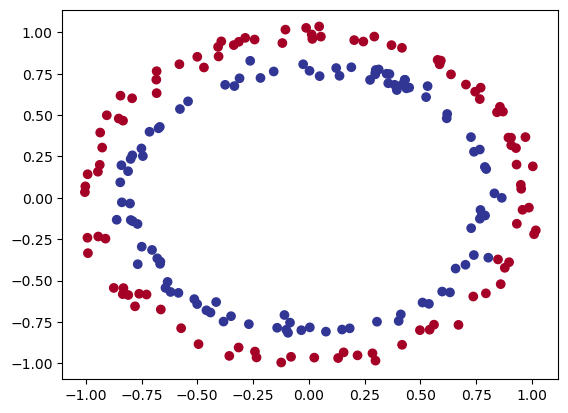

In [25]:
plt.scatter(x=X_test[:,0].cpu(),
            y =X_test[:,1].cpu(),
            c = y_preds_test.cpu(),
            cmap= plt.cm.RdYlBu)

In [26]:
import requests
from pathlib import Path

# Download the helper functions learn Pytorch repo(if it is not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")

else:
    print("downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


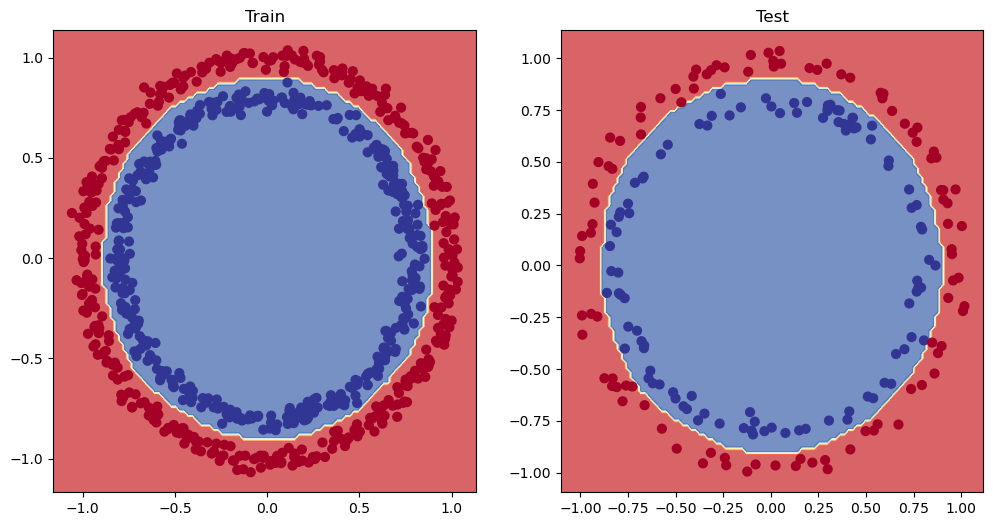

In [27]:
# Plot decision boundary of the model
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_0,
                       X=X_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_0,
                       X=X_test,
                       y=y_test)
plt.show()

I have personally got the model to fit very well on the data by making some changes to the model class. So much so that the model is giving a train and test accuracy of 99%+. But the instructor seems to be telling us to go forward with improving the model performance. Hence the following code.

## 5. Improving a model (form a model perspective)

* Add more layers — give the model more chances to learn about patterns in the data
* Add more hidden units — go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these values are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [28]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
# create a loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)

In [30]:
# Write a training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(24)
epochs = 1000

model_1.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_logits= model_1(X_train).squeeze()
    y_preds_train = torch.round(torch.sigmoid(y_logits))

    training_loss = loss_fn(y_logits, y_train)
    training_acc = accuracy_fn(y_train, y_preds_train)

    optimizer.zero_grad()

    training_loss.backward()

    optimizer.step()

    # testing
    model_1.eval()
    with torch.inference_mode():
        y_logits_test = model_1(X_test).squeeze()
        y_preds_test = torch.round(torch.sigmoid(y_logits_test))

        test_loss = loss_fn(y_logits_test, y_test)
        test_acc = accuracy_fn(y_test, y_preds_test)

    if epoch % 100 == 0:
        print(f"Epoch : {epoch}, Training Accuracy : {training_acc}% | Training Loss : {training_loss:.5f}, Test Accuracy : {test_acc}% | Test Loss : {test_loss:.5f}")

model_1.state_dict()

Epoch : 0, Training Accuracy : 50.875% | Training Loss : 0.69396, Test Accuracy : 51.0% | Test Loss : 0.69261
Epoch : 100, Training Accuracy : 50.24999999999999% | Training Loss : 0.69369, Test Accuracy : 50.0% | Test Loss : 0.69269
Epoch : 200, Training Accuracy : 50.125% | Training Loss : 0.69351, Test Accuracy : 49.5% | Test Loss : 0.69282
Epoch : 300, Training Accuracy : 50.5% | Training Loss : 0.69339, Test Accuracy : 49.0% | Test Loss : 0.69295
Epoch : 400, Training Accuracy : 50.375% | Training Loss : 0.69329, Test Accuracy : 48.5% | Test Loss : 0.69309
Epoch : 500, Training Accuracy : 49.875% | Training Loss : 0.69322, Test Accuracy : 49.5% | Test Loss : 0.69322
Epoch : 600, Training Accuracy : 49.5% | Training Loss : 0.69317, Test Accuracy : 53.0% | Test Loss : 0.69335
Epoch : 700, Training Accuracy : 49.375% | Training Loss : 0.69313, Test Accuracy : 50.5% | Test Loss : 0.69347
Epoch : 800, Training Accuracy : 50.0% | Training Loss : 0.69309, Test Accuracy : 51.0% | Test Loss

OrderedDict([('layer_1.weight',
              tensor([[ 0.5396,  0.5864],
                      [-0.1628,  0.6511],
                      [-0.1572,  0.1415],
                      [-0.3458,  0.4145],
                      [ 0.6190, -0.5210],
                      [ 0.6191,  0.1348],
                      [ 0.5211,  0.0951],
                      [ 0.3390, -0.1008],
                      [ 0.5363,  0.0999],
                      [-0.3382,  0.1759]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3256, -0.0831, -0.2871,  0.4692, -0.5579, -0.3261, -0.1995, -0.4250,
                       0.0673, -0.6979], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2935, -0.2669,  0.2435,  0.0513, -0.0993,  0.2018,  0.0546,  0.2583,
                        0.0400, -0.1016],
                      [ 0.0703, -0.0889,  0.1342,  0.2849,  0.1764, -0.1501,  0.1727,  0.0513,
                        0.1506, -0.1894],
                      [-0.2993, -0.119

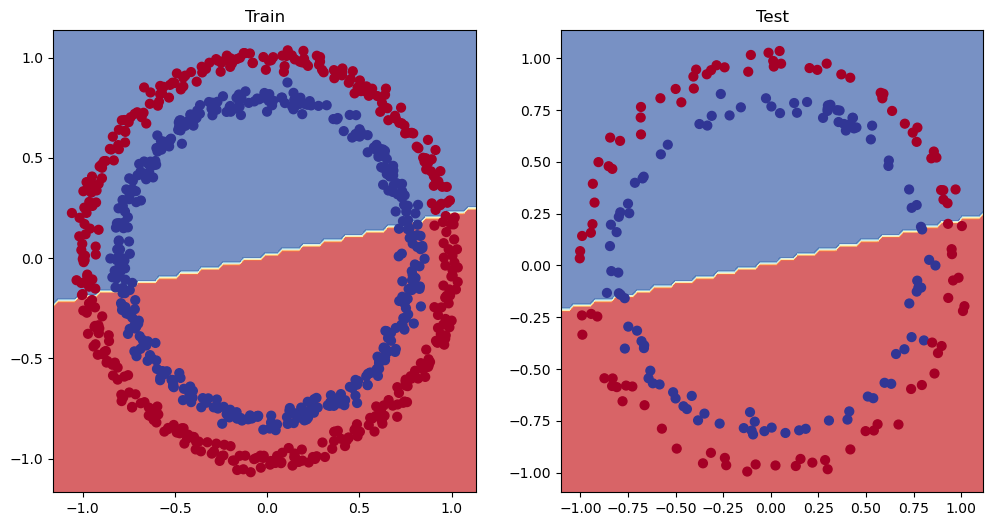

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_1,
                       X=X_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_1,
                       X=X_test,
                       y=y_test)
plt.show()

### 5.1 Preparing the data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [32]:
# create some data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start=start, step= step, end=end).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# check the data
print(len(X_regression),len(y_regression))

X_regression[:5], y_regression[:5]

100 100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [33]:
# create train and test splits

train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

print(f"Length of X_train_regression : {len(X_train_regression)} | Length of y_train_regression : {len(y_train_regression)}")
print(f"Length of X_test_regression : {len(X_test_regression)} | Length of y_test_regression : {len(y_test_regression)}")

Length of X_train_regression : 80 | Length of y_train_regression : 80
Length of X_test_regression : 20 | Length of y_test_regression : 20


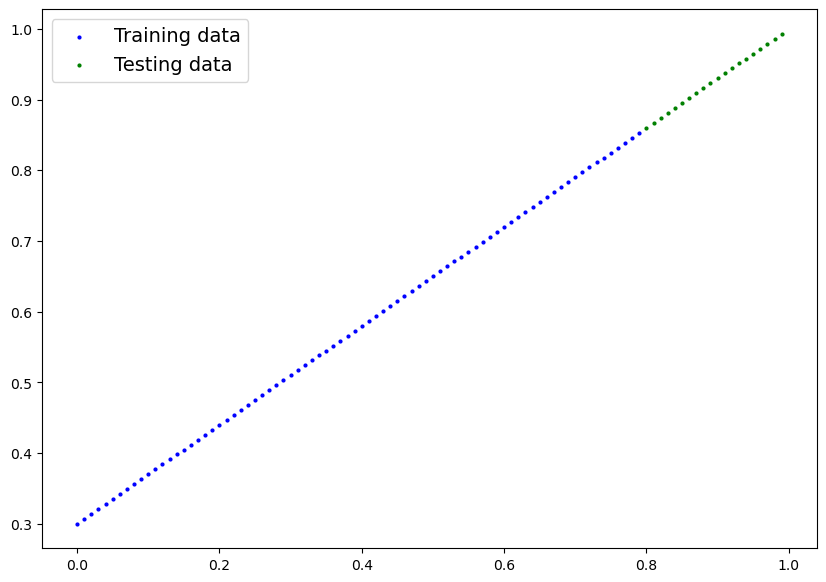

In [34]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data= X_test_regression, test_labels=y_test_regression)

In [35]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
# create a loss function
loss_fn = torch.nn.L1Loss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)

In [37]:
# Write a training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(24)
epochs = 1000

X_train_regression = X_train_regression.to(device)
X_test_regression = X_test_regression.to(device)
y_train_regression = y_train_regression.to(device)
y_test_regression = y_test_regression.to(device)

for epoch in range(epochs):
    model_2.train()

    y_preds_train = model_2(X_train_regression)

    training_loss = loss_fn(y_preds_train, y_train_regression)

    optimizer.zero_grad()

    training_loss.backward()

    optimizer.step()

    # testing
    model_2.eval()
    with torch.inference_mode():
        y_preds_test = model_2(X_test_regression)

        test_loss = loss_fn(y_preds_test, y_test_regression)

    if epoch % 100 == 0:
        print(f"Epoch : {epoch} | Training Loss : {training_loss:.5f} | Test Loss : {test_loss:.5f}")

model_1.state_dict()

Epoch : 0 | Training Loss : 0.75986 | Test Loss : 0.91103
Epoch : 100 | Training Loss : 0.02858 | Test Loss : 0.00081
Epoch : 200 | Training Loss : 0.02533 | Test Loss : 0.00209
Epoch : 300 | Training Loss : 0.02137 | Test Loss : 0.00305
Epoch : 400 | Training Loss : 0.01964 | Test Loss : 0.00341
Epoch : 500 | Training Loss : 0.01940 | Test Loss : 0.00387
Epoch : 600 | Training Loss : 0.01903 | Test Loss : 0.00379
Epoch : 700 | Training Loss : 0.01878 | Test Loss : 0.00381
Epoch : 800 | Training Loss : 0.01840 | Test Loss : 0.00329
Epoch : 900 | Training Loss : 0.01798 | Test Loss : 0.00360


OrderedDict([('layer_1.weight',
              tensor([[ 0.5396,  0.5864],
                      [-0.1628,  0.6511],
                      [-0.1572,  0.1415],
                      [-0.3458,  0.4145],
                      [ 0.6190, -0.5210],
                      [ 0.6191,  0.1348],
                      [ 0.5211,  0.0951],
                      [ 0.3390, -0.1008],
                      [ 0.5363,  0.0999],
                      [-0.3382,  0.1759]])),
             ('layer_1.bias',
              tensor([-0.3256, -0.0831, -0.2871,  0.4692, -0.5579, -0.3261, -0.1995, -0.4250,
                       0.0673, -0.6979])),
             ('layer_2.weight',
              tensor([[ 0.2935, -0.2669,  0.2435,  0.0513, -0.0993,  0.2018,  0.0546,  0.2583,
                        0.0400, -0.1016],
                      [ 0.0703, -0.0889,  0.1342,  0.2849,  0.1764, -0.1501,  0.1727,  0.0513,
                        0.1506, -0.1894],
                      [-0.2993, -0.1192, -0.2436,  0.2571,  0.0970,  0.1

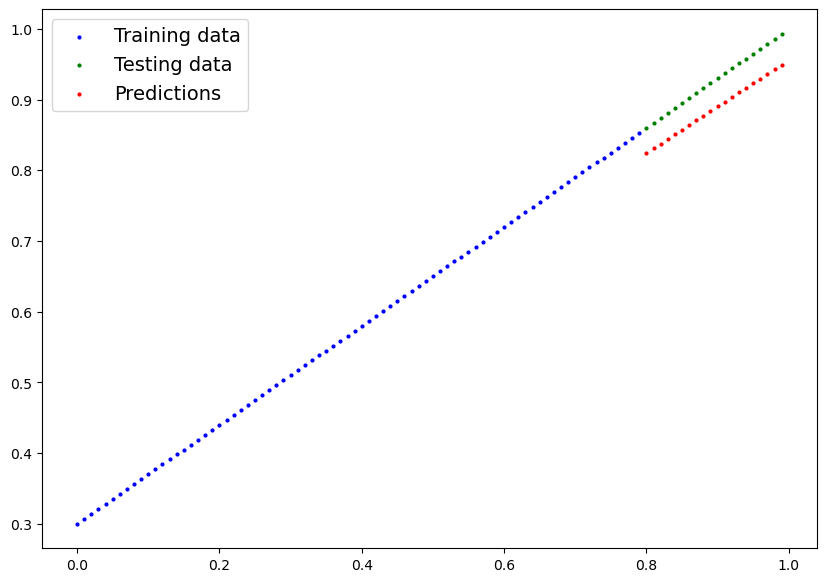

In [38]:
# Turn on evaluation
model_2.eval()

# Make predictions
with torch.inference_mode():
    y_preds_test = model_2(X_test_regression).squeeze()

# Plot the predictions
plot_predictions(X_train_regression.cpu(),y_train_regression.cpu(), X_test_regression.cpu(),y_test_regression.cpu(),y_preds_test.cpu())

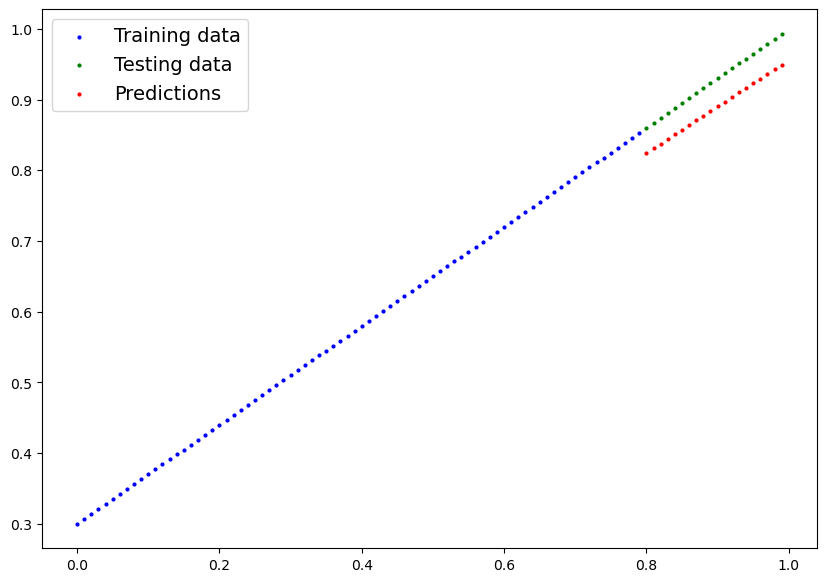

In [39]:
# Turn on evaluation mode

model_2.eval()

with torch.inference_mode():
    y_preds_regression = model_2(X_test_regression)

y_preds_regression

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds_regression.cpu())

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in Machine Learning terms, an infinite (but really it is finite) number of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

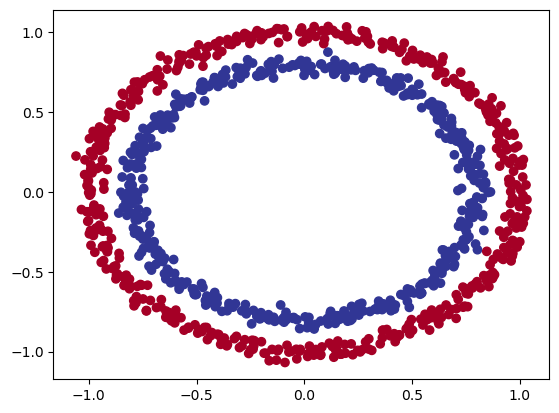

In [40]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [41]:
# Convert data to tensors
import torch
from torch import nn
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(X_train[:5], (X_train).shape, type(X_train))
print(y_train[:5], (y_train).shape, type(y_train))
print(X_test[:5],  (X_test).shape, type(X_test))
print(y_test[:5],  (y_test).shape, type(y_test))

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]]) torch.Size([800, 2]) <class 'torch.Tensor'>
tensor([1., 0., 0., 0., 1.]) torch.Size([800]) <class 'torch.Tensor'>
tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438]]) torch.Size([200, 2]) <class 'torch.Tensor'>
tensor([1., 0., 1., 0., 1.]) torch.Size([200]) <class 'torch.Tensor'>


### 6.2 Building a model

Lets build a model with non-linear activation functions.

* Linear = straight linear
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in the data.


In [42]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [43]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features= 10, out_features=10)
        self.layer_3 = nn.Linear(in_features= 10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_3 = CircleModelV2()

print(model_3.state_dict())
model_3.to(device)

OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998],
        [ 0.5451,  0.1045],
        [-0.3301,  0.1802]])), ('layer_1.bias', tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
         0.0667, -0.6984])), ('layer_2.weight', tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
          0.0346, -0.0997],
        [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
          0.1606, -0.1927],
        [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
          0.2475, -0.2247],
        [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
         -0.1886, -0.1886],
        [ 0.2844,  0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,
          0.1132,  0.26

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [44]:
# Doing model inference on untrained model

model_3.eval()

with torch.inference_mode():
    untrained_preds = model_3(X_test.to(device))

print(f"Length of predictions : {len(untrained_preds)}, Shape : {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}, Shape:{X_test.shape}")
print(f"\n First 10 predicitons : \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions : 200, Shape : torch.Size([200, 1])
Length of test samples : 200, Shape:torch.Size([200, 2])

 First 10 predicitons : 
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [45]:
# Setup a loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr = 0.1)

In [46]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [47]:
# calculate accuracy

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc= (correct/len(y_pred))*100
    return acc

In [48]:
# Random Seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs =10000

model_3.to(device)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # Training
    model_3.train()

    # Forward pass
    y_logits_train = model_3(X_train).squeeze()
    y_preds_train = torch.round(torch.sigmoid(y_logits_train))

    # Calculate the loss and accuracy
    training_loss = loss_fn(y_logits_train, y_train)
    training_acc = accuracy_fn(y_train, y_preds_train)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation
    training_loss.backward()

    # Optimizer step(gradient descent)
    optimizer.step()

    # Testing
    model_3.eval()
    with torch.inference_mode():
        # Forward Pass
        y_logits_test = model_3(X_test).squeeze()
        y_preds_test = torch.round(torch.sigmoid(y_logits_test))

        # Testing loss and accuracy
        testing_loss = loss_fn(y_logits_test, y_test)
        testing_acc = accuracy_fn(y_test, y_preds_test)

    if epoch%1000 == 0:
        print(f"Epoch : {epoch} | Training Loss : {training_loss} | Training Accuracy : {training_acc} | Testing Loss : {testing_loss} | Testing Accuracy : {testing_acc} ")

Epoch : 0 | Training Loss : 0.6929463148117065 | Training Accuracy : 50.0 | Testing Loss : 0.6931881308555603 | Testing Accuracy : 50.0 
Epoch : 1000 | Training Loss : 0.5681842565536499 | Training Accuracy : 87.75 | Testing Loss : 0.5737816691398621 | Testing Accuracy : 86.5 
Epoch : 2000 | Training Loss : 0.04176006093621254 | Training Accuracy : 99.875 | Testing Loss : 0.06583176553249359 | Testing Accuracy : 100.0 
Epoch : 3000 | Training Loss : 0.016718432307243347 | Training Accuracy : 99.875 | Testing Loss : 0.033626582473516464 | Testing Accuracy : 100.0 
Epoch : 4000 | Training Loss : 0.010481312870979309 | Training Accuracy : 100.0 | Testing Loss : 0.024508237838745117 | Testing Accuracy : 99.5 
Epoch : 5000 | Training Loss : 0.007652216590940952 | Training Accuracy : 100.0 | Testing Loss : 0.019932087510824203 | Testing Accuracy : 99.5 
Epoch : 6000 | Training Loss : 0.006027621682733297 | Training Accuracy : 100.0 | Testing Loss : 0.017257098108530045 | Testing Accuracy : 9

### 6.4 Evaluating a model trained with non-linear activation functions

In [49]:
# Make Predictions

model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test).squeeze()))

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

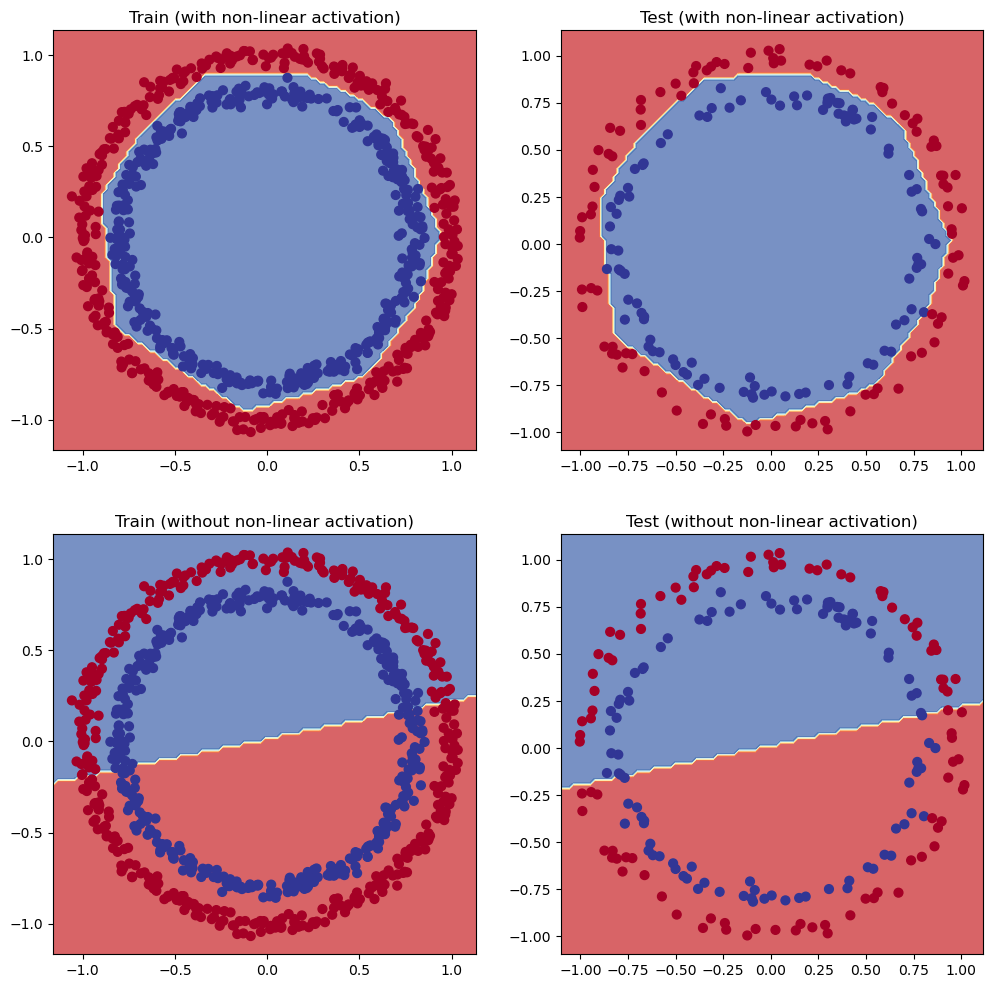

In [50]:
# Plot decision boundaries

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Train (with non-linear activation)")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(2,2,2)
plt.title("Test (with non-linear activation)")
plot_decision_boundary(model_3, X_test, y_test)
plt.subplot(2,2,3)
plt.title("Train (without non-linear activation)")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(2,2,4)
plt.title("Test (without non-linear activation)")
plot_decision_boundary(model_1, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give the modle the tools to descover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear and non-linear functions.

In [51]:
# Create a tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

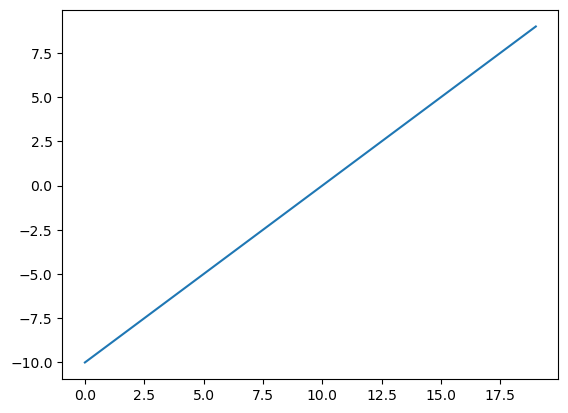

In [52]:
# Visualize the tensor
plt.plot(A)

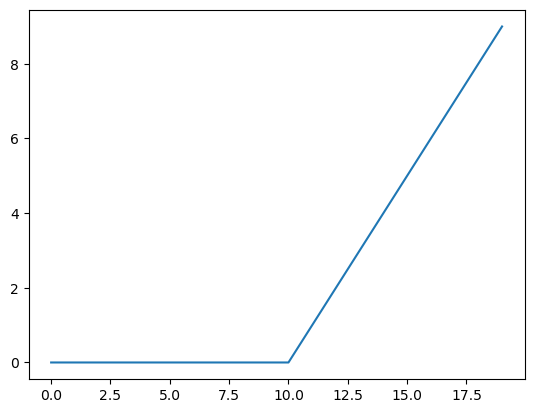

In [53]:
plt.plot(torch.relu(A))

In [54]:
def relu(x:torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0).type(torch.float32), x) # inputs must be tensors

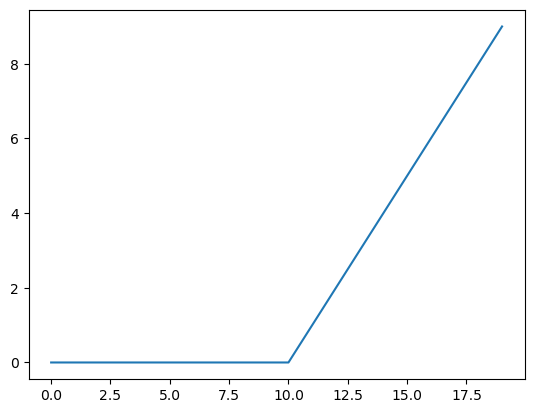

In [55]:
plt.plot(relu(A))

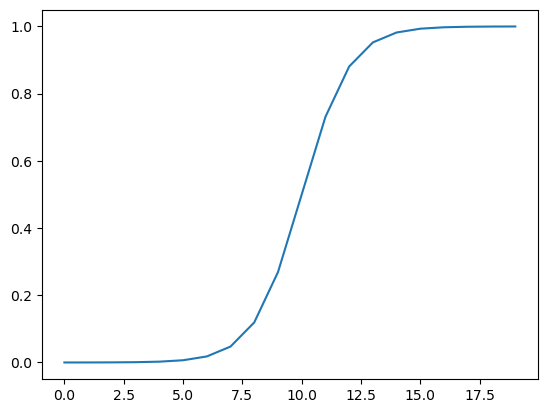

In [56]:
plt.plot(torch.sigmoid(A))

In [57]:
def sigmoid(x : torch.Tensor) -> torch.Tensor:
    return 1 / (1+torch.exp(-x))

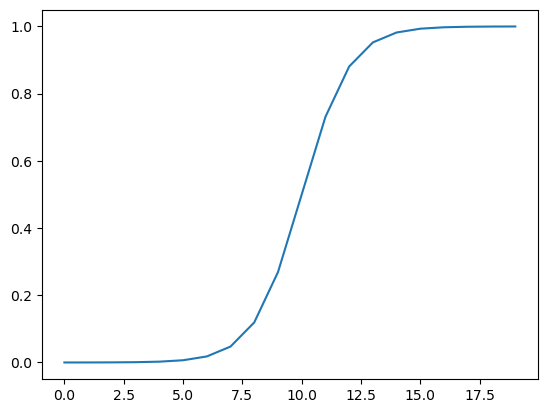

In [58]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs dog, spam vs not spam, fraud vs not fraud)
* Multi-class classifiaation = more than one thing or another (cat vs dog vs chicken)


### 8.1 Creating a toy multi-class dataset

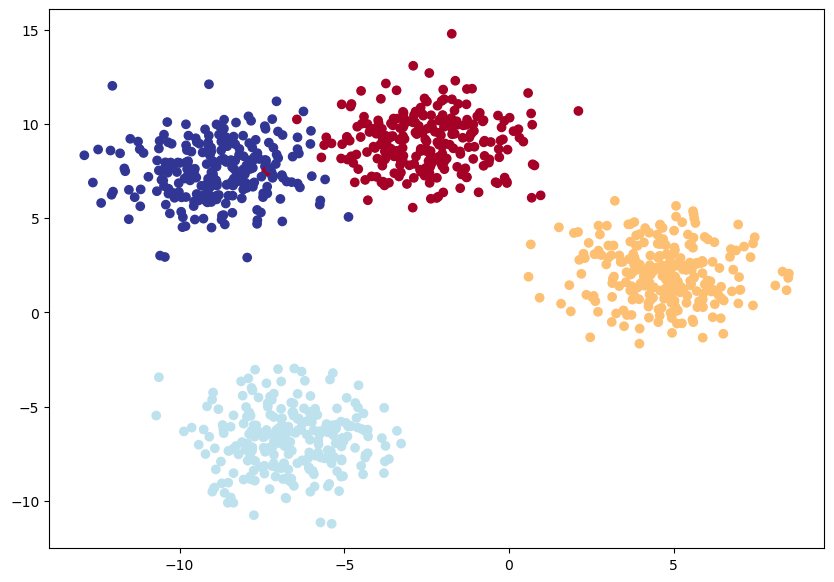

In [59]:
# Import Dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std = 1.5, # give the classes a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train , X_blob_test , y_blob_train , y_blob_test = train_test_split(X_blob,y_blob, test_size = 0.2, shuffle=True, random_state=RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch

In [60]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [61]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        """ Initialzizes multi-class classification model.

        Args:
            input_features (int): number of input features to the model
            output_features (int): number of output features to the model
            hidden_units (int): number of hidden units between layers, default 8

        Returns:

        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)
    
# Create an instance of BlobModel and send it to target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [62]:
# Creating a loss function
loss_fn = nn.CrossEntropyLoss()

# Creating an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr = 0.01)

### 8.4 Getting prediction probabilities for a multi-class PyTorch Model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediciton probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax()`) -> Pred labels (take the argmax [`torch.argmax()`] of the prediciton probabilities)

In [63]:
model_4.eval()
X_blob_test = X_blob_test.to(device)
with torch.inference_mode():
    y_preds_logits = model_4(X_blob_test).squeeze()

y_preds_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [64]:
# Convert our model's logit outputs to prediction probabilities

y_pred_probs = torch.softmax(y_preds_logits, dim =1)
print(y_preds_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [65]:
# Convert our model's prediciton probabilities to predition labels

y_preds = torch.argmax(torch.softmax(y_preds_logits, dim =1), dim =1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [66]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

### 8.5 Create a training loop and testing loop for a multi-class PyTorch model

In [67]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 1000

model_4.to(device)

X_blob_train = X_blob_train.to(device)
y_blob_train = y_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_test = y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
    # Training
    model_4.train()

    # Forward Pass
    y_logits_train = model_4(X_blob_train)
    y_preds_train = torch.softmax(y_logits_train, dim=1).argmax(dim=1)

    # Calculate the loss and accuracy
    training_loss = loss_fn(y_logits_train, y_blob_train)
    training_acc = accuracy_fn(y_true=y_blob_train,y_pred=y_preds_train)


    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation
    training_loss.backward()

    # Optimizer Step (gradient descent)
    optimizer.step()

    # Testing
    model_4.eval()
    with torch.inference_mode():
        # Forward pass
        y_logits_test = model_4(X_blob_test)
        y_preds_test = torch.softmax(y_logits_test, dim =1).argmax(dim=1)

        # Calculate the loss and accuracy
        testing_loss = loss_fn(y_logits_test,y_blob_test)
        training_acc = accuracy_fn(y_true=y_blob_test,y_pred=y_preds_test)

    if epoch % 100 == 0:
        print(f"Epoch : {epoch} | Training Loss : {training_loss} | Training Accuracy : {training_acc} | Testing Loss : {testing_loss} | Testing Accuracy : {testing_acc}")

Epoch : 0 | Training Loss : 1.158826470375061 | Training Accuracy : 38.5 | Testing Loss : 1.1472400426864624 | Testing Accuracy : 99.5
Epoch : 100 | Training Loss : 0.6438220739364624 | Training Accuracy : 97.0 | Testing Loss : 0.6811696887016296 | Testing Accuracy : 99.5
Epoch : 200 | Training Loss : 0.4189146161079407 | Training Accuracy : 100.0 | Testing Loss : 0.4422791600227356 | Testing Accuracy : 99.5
Epoch : 300 | Training Loss : 0.23740409314632416 | Training Accuracy : 99.5 | Testing Loss : 0.24454589188098907 | Testing Accuracy : 99.5
Epoch : 400 | Training Loss : 0.10432887822389603 | Training Accuracy : 99.5 | Testing Loss : 0.10147646069526672 | Testing Accuracy : 99.5
Epoch : 500 | Training Loss : 0.06481987237930298 | Training Accuracy : 99.5 | Testing Loss : 0.05913901329040527 | Testing Accuracy : 99.5
Epoch : 600 | Training Loss : 0.05031441152095795 | Training Accuracy : 99.5 | Testing Loss : 0.043545857071876526 | Testing Accuracy : 99.5
Epoch : 700 | Training Loss

### 8.6 Making and evaluating predictions with PyTorch multi-class model

In [68]:
# Make predicitions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.6780,  5.9374, -7.5888, -8.3576],
        [-2.1662, -6.3420, -3.7323,  3.1173],
        [-3.4562, -3.9502,  3.1581, -2.6437],
        [-1.1644,  4.1617, -3.8413, -4.8268],
        [ 3.7170, -1.3749, -9.0873, -6.8768],
        [-2.8119, -7.5421, -4.3044,  3.7828],
        [-3.0704, -3.3803,  2.7892, -2.1602],
        [ 3.3590, -4.0543, -6.8652, -3.5161],
        [-4.4254, -5.0603,  3.8233, -3.4248],
        [ 3.4808, -3.0514, -7.4990, -4.6582]], device='cuda:0')

In [69]:
# Go form logits -> prediction probalilities
y_pred_probs = torch.softmax(y_logits, dim =1)

# Go from predition probabilities -> prediction labels
y_pred_labels = torch.argmax(y_pred_probs, dim=1)
y_pred_labels

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

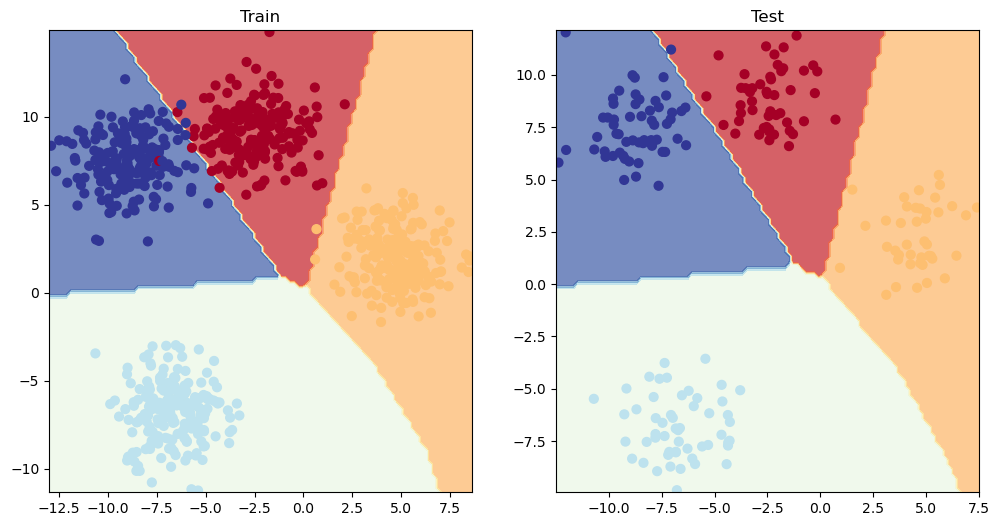

In [70]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification Report

#### The torchmetrics library

In [71]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task = "multiclass",num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_pred_labels, y_blob_test)

tensor(0.9950, device='cuda:0')

### Exercises

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [72]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Setup random seed
RANDOM_SEED = 42

cuda


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [73]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

n_samples = 1000

X, y = make_moons(n_samples=n_samples,
                  noise = 0.03,
                  random_state=RANDOM_SEED)


In [74]:
# Turn data into a DataFrame
import pandas as pd

moons = pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})

moons.head()

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


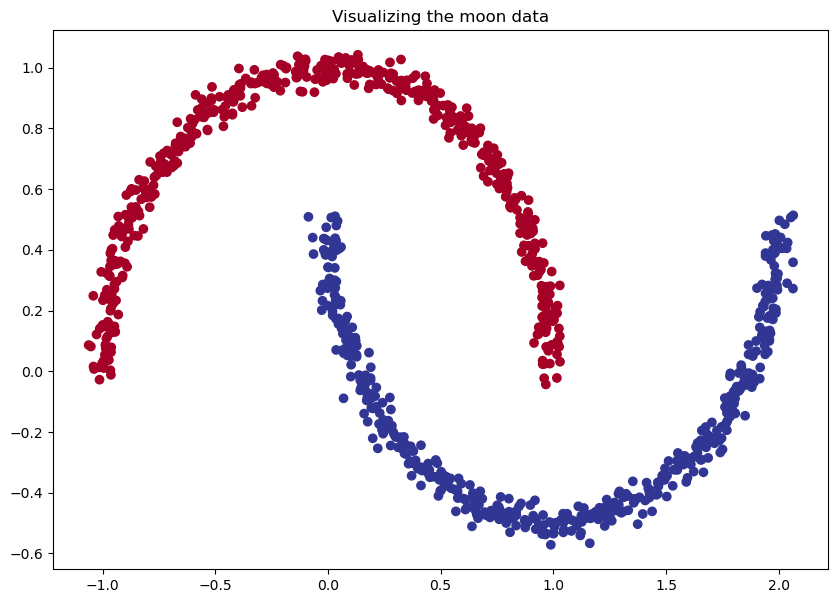

In [75]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.title("Visualizing the moon data")
plt.show()

In [76]:
# Turn data into tensors of dtype float
X_moon = torch.from_numpy(X).type(dtype=torch.float32)
y_moon = torch.from_numpy(y).type(dtype=torch.float32)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon, y_moon, test_size=0.2, shuffle=True, random_state=RANDOM_SEED)

X_moon_train.shape, X_moon_test.shape, y_moon_train.shape, y_moon_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [77]:
X_moon_train.dtype, X_moon_test.dtype, y_moon_train.dtype, y_moon_test.dtype

(torch.float32, torch.float32, torch.float32, torch.float32)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [78]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        ## Your code here ##
        return self.linear_layer_stack(x)

# Instantiate the model
## Your code here ##
model_5 = MoonModelV0(input_features= 2, output_features= 1, hidden_units= 16)
model_5.to(device)
model_5.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265],
                     device='cu

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [79]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params= model_5.parameters(),
                            lr = 0.01)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [80]:
# What's coming out of our model?
model_5.eval()
with torch.inference_mode():
    y_logits = model_5(X_moon_test.to(device)).squeeze()
 
# logits (raw outputs of model)
print(f"Logits: {y_logits}")
## Your code here ##

# Prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
print(f"Pred probs: {y_pred_probs}")
## Your code here ##

# Prediction labels
y_pred_labels = torch.round(y_pred_probs)
print(f"Pred labels: {y_pred_labels}")
## Your code here ##

print(y_logits.shape)

Logits: tensor([-0.1479, -0.1896, -0.1460, -0.2091, -0.1977, -0.2128, -0.1629, -0.1539,
        -0.1357, -0.1885, -0.2053, -0.1527, -0.1586, -0.1538, -0.2037, -0.2261,
        -0.1964, -0.2030, -0.1357, -0.2043, -0.1918, -0.1936, -0.1294, -0.2051,
        -0.1685, -0.1544, -0.1961, -0.1821, -0.2044, -0.1657, -0.2154, -0.1715,
        -0.2041, -0.1833, -0.2034, -0.1813, -0.1624, -0.1541, -0.1778, -0.1604,
        -0.1286, -0.1331, -0.2042, -0.1710, -0.2027, -0.1928, -0.1694, -0.1966,
        -0.1813, -0.2090, -0.2064, -0.2047, -0.1811, -0.1767, -0.2144, -0.1969,
        -0.2139, -0.1530, -0.1282, -0.2016, -0.2051, -0.1540, -0.2004, -0.1607,
        -0.1542, -0.1796, -0.2276, -0.1981, -0.1821, -0.1890, -0.2208, -0.1818,
        -0.2025, -0.1388, -0.2079, -0.2200, -0.1787, -0.1647, -0.2025, -0.2021,
        -0.2022, -0.1484, -0.1531, -0.1766, -0.1283, -0.1958, -0.1762, -0.2011,
        -0.1808, -0.1915, -0.1421, -0.1814, -0.1786, -0.1953, -0.1544, -0.2026,
        -0.1871, -0.1282, -0.201

In [81]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="binary", num_classes=2).to(device) # send accuracy function to device
acc_fn(y_pred_labels,y_moon_test.to(device))

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


tensor(0.5000, device='cuda:0')

In [82]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 10000

# Send data to the device
model_5.to(device)
X_moon_train = X_moon_train.to(device)
X_moon_test = X_moon_test.to(device)
y_moon_train = y_moon_train.to(device)
y_moon_test = y_moon_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_5.train()

  # 1. Forward pass (logits output)
  y_train_logits = model_5(X_moon_train).squeeze()
  # Turn logits into prediction probabilities
  y_train_pred_probs = torch.sigmoid(y_train_logits)

  # Turn prediction probabilities into prediction labels
  y_train_pred_labels = torch.round(y_train_pred_probs)

  # 2. Calculaute the loss
  #print(y_train_logits.dtype, y_blob_train.dtype)
  training_loss = loss_fn(y_train_logits, y_moon_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  training_acc = acc_fn(y_moon_train, y_train_pred_labels.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  training_loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  optimizer.step()

  ### Testing
  model_0.eval() 
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    y_test_logits = model_5(X_moon_test).squeeze()
    # Turn the test logits into prediction labels
    y_test_pred_probs = torch.sigmoid(y_test_logits)
    y_test_pred_labels = torch.round(y_test_pred_probs)

    # 2. Caculate the test loss/acc
    testing_loss = loss_fn(y_test_logits, y_moon_test)
    testing_acc = acc_fn(y_moon_test, y_test_pred_labels.int())

  # Print out what's happening every 100 epochs
  if epoch % 1000 == 0:
    print(f"Epoch : {epoch} | Training Loss : {training_loss} | Training Accuracy : {training_acc} | Testing Loss : {testing_loss} | Testing Accuracy : {testing_acc}")
    

Epoch : 0 | Training Loss : 0.6950109601020813 | Training Accuracy : 0.5 | Testing Loss : 0.6945427060127258 | Testing Accuracy : 0.5
Epoch : 1000 | Training Loss : 0.29059839248657227 | Training Accuracy : 0.856249988079071 | Testing Loss : 0.30089542269706726 | Testing Accuracy : 0.8450000286102295
Epoch : 2000 | Training Loss : 0.23051714897155762 | Training Accuracy : 0.8912500143051147 | Testing Loss : 0.23236410319805145 | Testing Accuracy : 0.8999999761581421
Epoch : 3000 | Training Loss : 0.2151471972465515 | Training Accuracy : 0.8987500071525574 | Testing Loss : 0.21782970428466797 | Testing Accuracy : 0.8999999761581421
Epoch : 4000 | Training Loss : 0.20348937809467316 | Training Accuracy : 0.9037500023841858 | Testing Loss : 0.20820321142673492 | Testing Accuracy : 0.8949999809265137
Epoch : 5000 | Training Loss : 0.19161953032016754 | Training Accuracy : 0.9162499904632568 | Testing Loss : 0.19757135212421417 | Testing Accuracy : 0.8899999856948853
Epoch : 6000 | Training

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [83]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

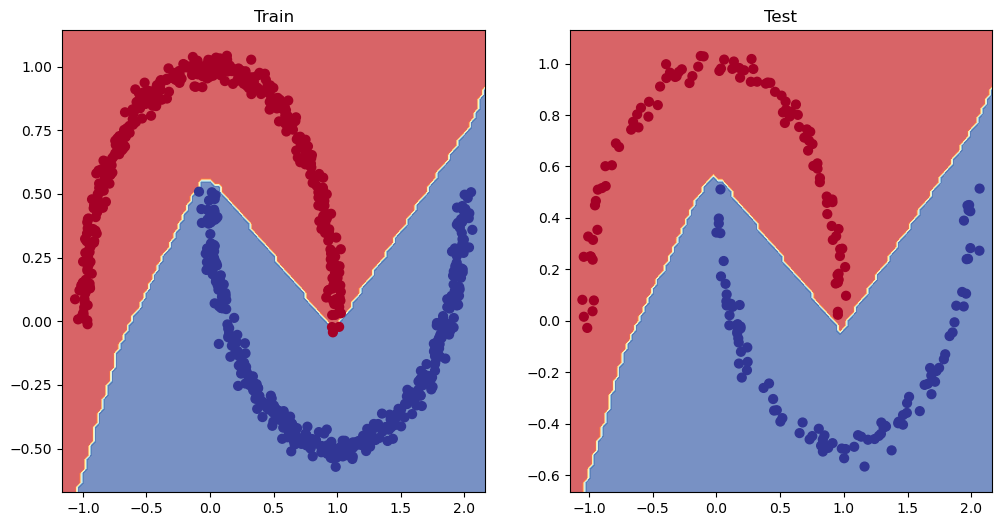

In [84]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_moon_train, y_moon_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_moon_test, y_moon_test)
plt.show()

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [85]:
# Create a straight line tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

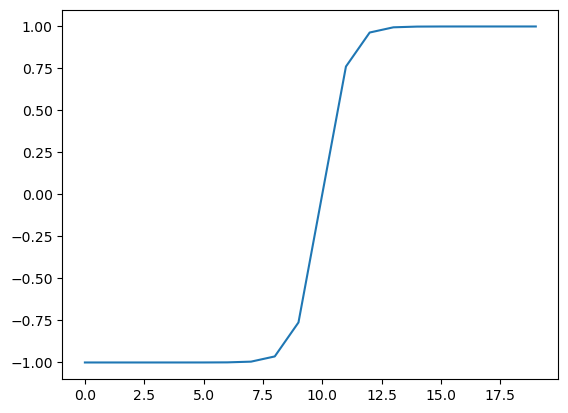

In [86]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(A))

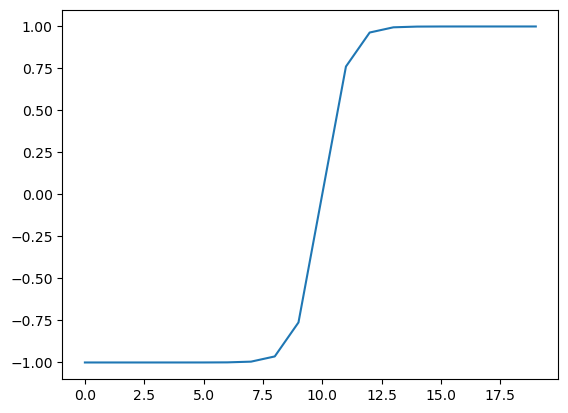

In [87]:
# Replicate torch.tanh() and plot it
def tanh(x):
    return torch.div(torch.sub(torch.exp(x) , torch.exp(-x)), torch.add(torch.exp(x) , torch.exp(-x)))

plt.plot(tanh(A))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

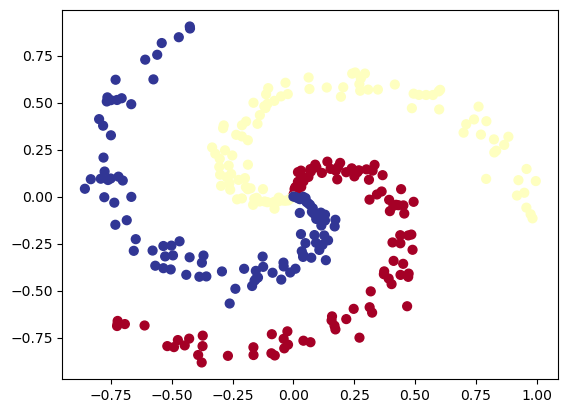

In [88]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [89]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_swirl_train, X_swirl_test, y_swirl_train, y_swirl_test = train_test_split(X, y, test_size= 0.2, random_state=RANDOM_SEED, shuffle= True) 
X_swirl_train.shape, X_swirl_test.shape, y_swirl_train.shape, y_swirl_test.shape 

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]))

In [90]:
# Let's calculuate the accuracy for when we fit our model
# colab doesn't come with torchmetrics
!pip -q install torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device)
acc_fn

MulticlassAccuracy()

In [91]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class SwirlModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_layers = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers, out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


# Instantiate model and send it to device
model_6 = SwirlModel(input_features = 2, output_features = 3, hidden_layers = 10)
model_6.to(device)
model_6.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],

In [92]:
# Setup data to be device agnostic
X_swirl_train = X_swirl_train.to(device)
X_swirl_test = X_swirl_test.to(device)
y_swirl_train = y_swirl_train.to(device)
y_swirl_test = y_swirl_test.to(device)

model_5.eval()
with torch.inference_mode():
    y_test_logits = model_6(X_swirl_test)

# Print out first 10 untrained model outputs (forward pass)
print(f"Logits : {y_train_logits}")
## Your code here ##

y_test_pred_probs = torch.softmax(y_test_logits, dim =1)
print(f"Pred probs : {y_test_pred_probs}")
## Your code here ##

y_test_pred_labels = torch.argmax(y_test_pred_probs, dim =1)
print(f"Pred labels : {y_test_pred_labels}")
## Your code here ##

Logits : tensor([ 3.7489, -5.7031, -4.2626, -4.0185,  4.7155, -4.2041,  4.6817,  3.3258,
        -4.8900, -4.2539,  4.6438, -4.1035, -4.2802, -4.2855,  5.3739, -4.5771,
        -4.3616, -4.3001, -5.8703,  4.0443,  3.8809,  4.3257, -3.4624,  5.1451,
         4.0571,  3.3091, -4.8735, -5.3410, -4.9546, -4.8976, -6.4987, -4.0085,
        -4.3399,  4.3675, -3.2120, -4.5786,  1.7703,  3.7468,  4.4498,  4.7130,
         5.4423,  5.1039, -5.3901,  5.1304, -4.9506,  4.4641, -4.5318, -1.9197,
        -5.1327, -6.6306, -3.4500,  4.1243, -5.8914,  4.9960,  3.5174,  4.6357,
        -1.3149,  4.1198,  4.2767,  4.4260, -5.9462, -4.6451, -3.8104,  4.6162,
        -5.1358, -3.0687,  5.0745, -4.3760, -3.3564, -4.8251,  5.9141,  2.2350,
         5.6699, -3.6224, -5.8998, -5.0576, -5.4082, -3.8000, -3.0154, -5.6600,
         5.4284,  4.9570, -6.0695,  3.8508, -4.9126,  5.3834, -4.3764,  4.8465,
        -5.6823,  4.9425,  0.3798,  5.4927, -5.1078, -5.8906, -4.6629,  2.3194,
        -5.5614,  4.7480,  1.09

In [93]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_6.parameters(),
                            lr = 0.01)

In [94]:
# Build a training loop for the model
epochs = 50000


# Loop over data
for epoch in range(epochs):

  ## Training
  model_6.train()
  # 1. Forward pass
  y_train_preds_logits = model_6(X_swirl_train)
  y_train_pred_labels = torch.softmax(y_train_preds_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  training_loss = loss_fn(y_train_preds_logits, y_swirl_train)
  training_acc = acc_fn(y_swirl_train, y_train_pred_labels)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  training_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_6.eval()
  with torch.inference_mode():
    # 1. Forward pass
    y_test_preds_logits = model_6(X_swirl_test)
    y_test_pred_labels = torch.softmax(y_test_preds_logits, dim=1).argmax(dim=1)
    
    # 2. Caculate loss and acc
    test_loss = loss_fn(y_test_preds_logits, y_swirl_test)
    test_acc = acc_fn(y_swirl_test, y_test_pred_labels)

  # Print out what's happening every 100 epochs
  if epoch % 5000 == 0:
     print(f"Epoch : {epoch} | Training Loss : {training_loss} | Training Accuracy : {training_acc} | Testing Loss : {testing_loss} | Testing Accuracy : {testing_acc}")
  

Epoch : 0 | Training Loss : 1.1174695491790771 | Training Accuracy : 0.32499998807907104 | Testing Loss : 0.03737231343984604 | Testing Accuracy : 1.0
Epoch : 5000 | Training Loss : 0.7845069766044617 | Training Accuracy : 0.574999988079071 | Testing Loss : 0.03737231343984604 | Testing Accuracy : 1.0
Epoch : 10000 | Training Loss : 0.5895551443099976 | Training Accuracy : 0.6708333492279053 | Testing Loss : 0.03737231343984604 | Testing Accuracy : 1.0
Epoch : 15000 | Training Loss : 0.39521369338035583 | Training Accuracy : 0.824999988079071 | Testing Loss : 0.03737231343984604 | Testing Accuracy : 1.0
Epoch : 20000 | Training Loss : 0.2257031798362732 | Training Accuracy : 0.9166666865348816 | Testing Loss : 0.03737231343984604 | Testing Accuracy : 1.0
Epoch : 25000 | Training Loss : 0.15917162597179413 | Training Accuracy : 0.9583333134651184 | Testing Loss : 0.03737231343984604 | Testing Accuracy : 1.0
Epoch : 30000 | Training Loss : 0.129787415266037 | Training Accuracy : 0.966666

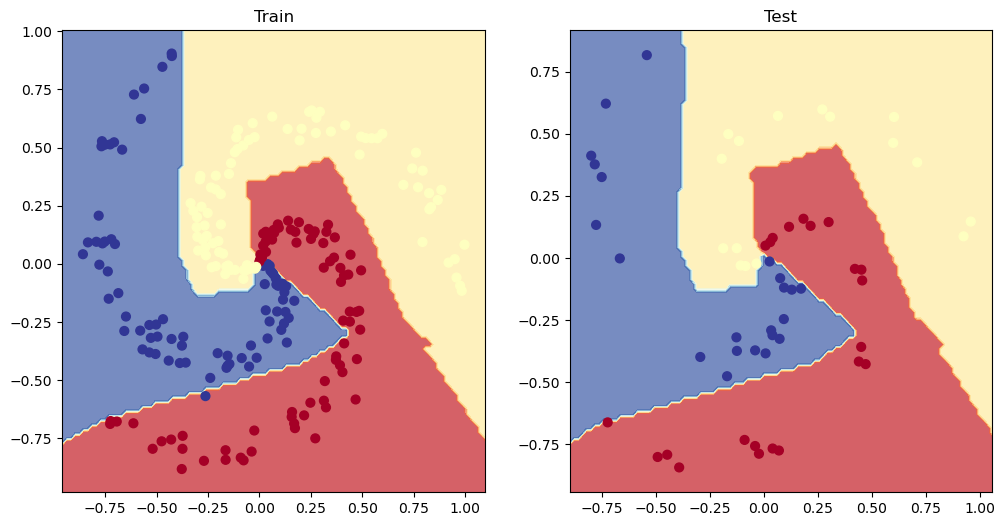

In [95]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6, X_swirl_train, y_swirl_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6, X_swirl_test, y_swirl_test)
plt.show()